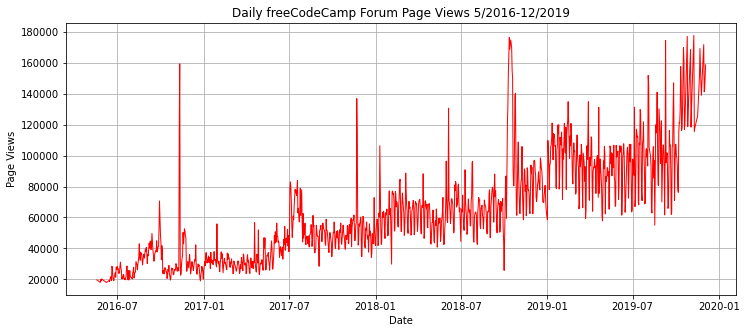

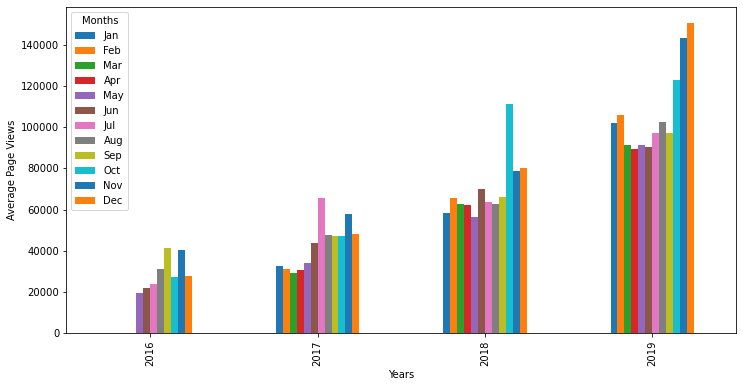

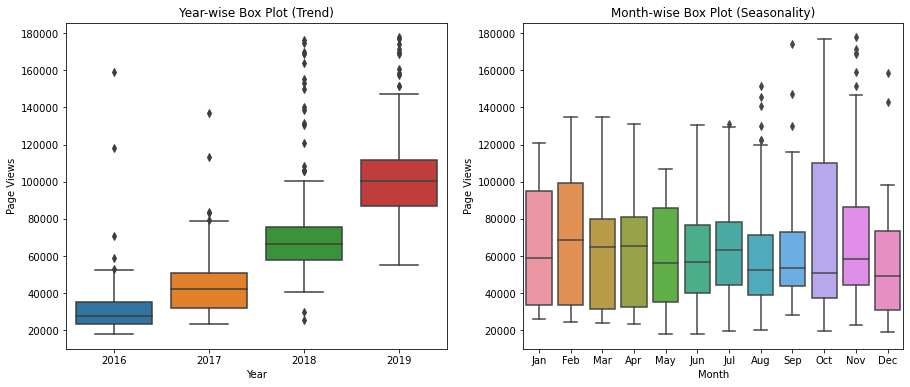

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

# Step 2: Download CSV file
url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv"
file_name = "fcc-forum-pageviews.csv"
urllib.request.urlretrieve(url, file_name)

# Step 3: Load dataset
df = pd.read_csv(file_name, parse_dates=["date"], index_col="date")

# Step 4: Data Cleaning (Remove top 2.5% and bottom 2.5% outliers)
lower_bound = df["value"].quantile(0.025)
upper_bound = df["value"].quantile(0.975)
df = df[(df["value"] >= lower_bound) & (df["value"] <= upper_bound)]

# Step 5: Line Plot Function
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(df.index, df["value"], color='r', linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    plt.grid(True)
    plt.show()

# Step 6: Bar Plot Function
def draw_bar_plot():
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month
    df_pivot = df_bar.groupby(["year", "month"])["value"].mean().unstack()

    fig = df_pivot.plot(kind="bar", figsize=(12, 6)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months", labels=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ])
    plt.show()

# Step 7: Box Plot Function
def draw_box_plot():
    df_box = df.copy()
    df_box["year"] = df_box.index.year
    df_box["month"] = df_box.index.strftime("%b")

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(x="month", y="value", data=df_box, order=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ], ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    plt.show()

# Step 8: Run all plots
draw_line_plot()
draw_bar_plot()
draw_box_plot()
